<a href="https://colab.research.google.com/github/jyoeti/Financial-Data-Analaysis/blob/main/finance_analyst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Key Metrics to Analyze:

Market Capitalization Trends – Identify the largest companies by market cap and their growth trends.

Quarterly Sales Performance – Compare sales across different sectors.

Market Cap vs. Sales Relationship – Check if higher market cap correlates with higher sales.
Sector-Wise Analysis – Identify leading sectors and their overall market share.

Top Gainers & Losers – Compare YoY or QoQ changes in market cap.

Outliers & Anomalies – Identify companies with significantly high or low valuations relative to sales.

Possible Approaches:

Python (Pandas, Matplotlib, Seaborn, Scikit-learn) – For data cleaning, visualization, and regression modeling.

Tableau/Power BI – For interactive dashboards showing trends and sector breakdowns.

Statistical Analysis – Hypothesis testing, correlation analysis, and clustering.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Load dataset
df = pd.read_csv("/content/Financial Analytics data.csv")

# Basic info
print(df.info())

# Check for missing values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              488 non-null    int64  
 1   Name               488 non-null    object 
 2   Mar Cap - Crore    479 non-null    float64
 3   Sales Qtr - Crore  365 non-null    float64
 4   Unnamed: 4         94 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 19.2+ KB
None
S.No.                  0
Name                   0
Mar Cap - Crore        9
Sales Qtr - Crore    123
Unnamed: 4           394
dtype: int64


In [ ]:
df.head()

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
0,1,Reliance Inds.,583436.72,99810.00,NaN
1,2,TCS,563709.84,30904.00,NaN
2,3,HDFC Bank,482953.59,20581.27,NaN
3,4,ITC,320985.27,9772.02,NaN
4,5,H D F C,289497.37,16840.51,NaN


In [ ]:

# Convert Market Cap & Sales to numeric (if needed)
df['Mar Cap - Crore'] = pd.to_numeric(df['Mar Cap - Crore'], errors='coerce')
df['Sales Qtr - Crore'] = pd.to_numeric(df['Sales Qtr - Crore'], errors='coerce')

In [ ]:
print(df[['Mar Cap - Crore', 'Sales Qtr - Crore']].describe())

       Mar Cap - Crore  Sales Qtr - Crore
count       479.000000         365.000000
mean      28043.857119        4395.976849
std       59464.615831       11092.206185
min        3017.070000          47.240000
25%        4843.575000         593.740000
50%        9885.050000        1278.300000
75%       23549.900000        2840.750000
max      583436.720000      110666.930000


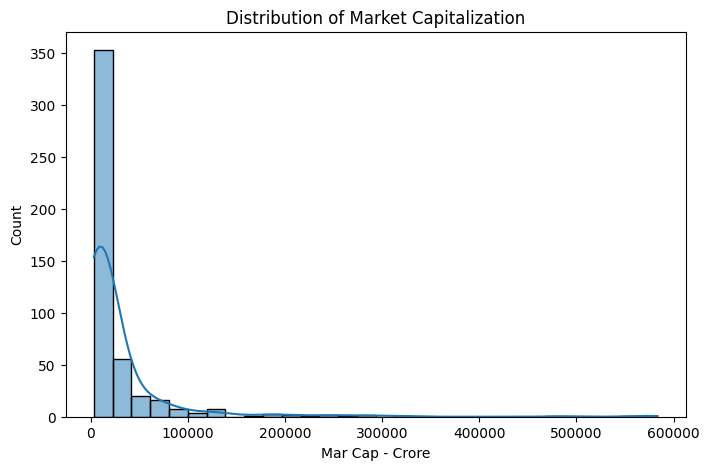

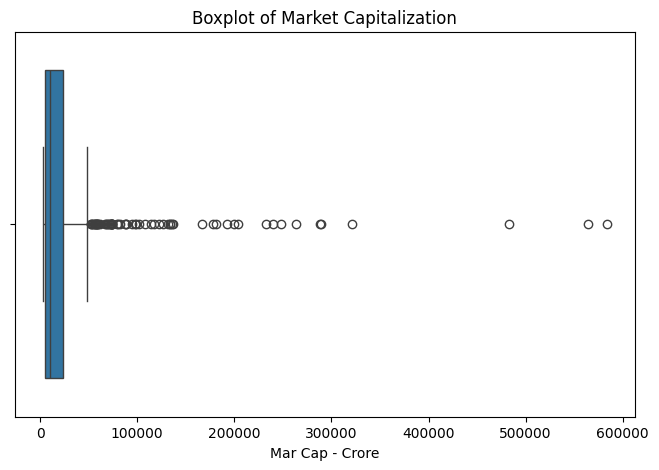

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Market Capitalization
plt.figure(figsize=(8, 5))
sns.histplot(df['Mar Cap - Crore'], bins=30, kde=True)
plt.title("Distribution of Market Capitalization")
plt.show()

# Boxplot to detect outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Mar Cap - Crore'])
plt.title("Boxplot of Market Capitalization")
plt.show()


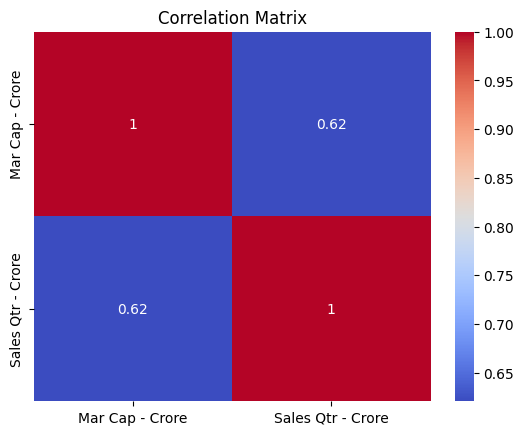

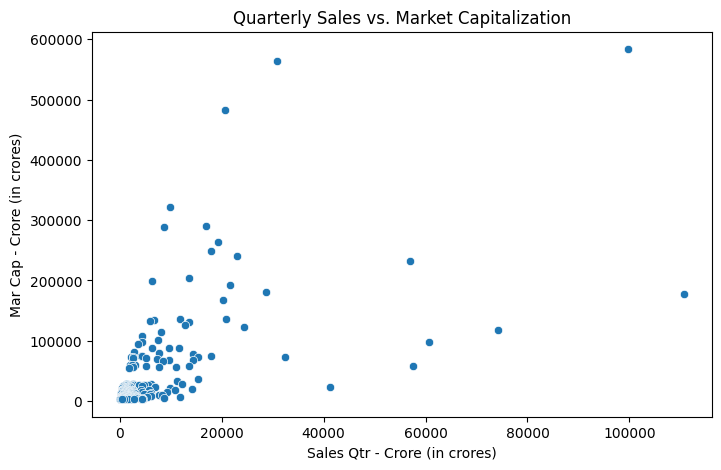

In [ ]:
# Correlation Matrix
corr_matrix = df[['Mar Cap - Crore', 'Sales Qtr - Crore']].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Scatter plot to visualize the relationship
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Sales Qtr - Crore'], y=df['Mar Cap - Crore'])
plt.title("Quarterly Sales vs. Market Capitalization")
plt.xlabel("Sales Qtr - Crore (in crores)")
plt.ylabel("Mar Cap - Crore (in crores)")
plt.show()


**Expected Outcome:**

If there's a strong positive correlation, it indicates sales drive market valuation.
If not, factors like brand value, investor sentiment, or growth potential play a role

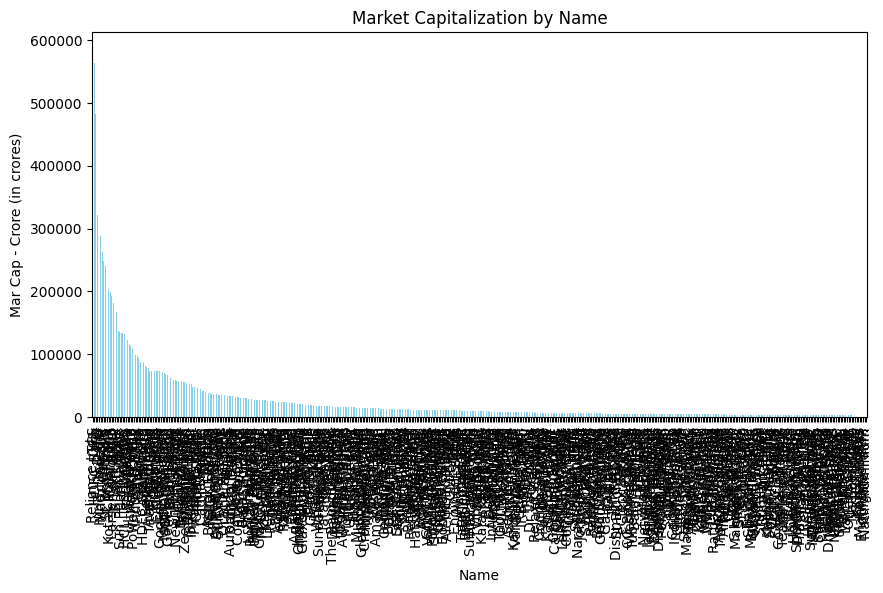

In [ ]:
# Aggregate Market Cap & Sales by Sector
sector_analysis = df.groupby("Name")[["Mar Cap - Crore", "Sales Qtr - Crore"]].sum().sort_values(by="Mar Cap - Crore", ascending=False)

# Bar Plot for Top Sectors
plt.figure(figsize=(10,5))
sector_analysis['Mar Cap - Crore'].plot(kind='bar', color='skyblue')
plt.title("Market Capitalization by Name")
plt.ylabel("Mar Cap - Crore (in crores)")
#plt.xticks(rotation=45)
plt.show()


In [ ]:
# Assuming dataset has previous market cap data
df['Market Cap Change'] = df['Mar Cap - Crore'].pct_change() * 100

# Top Gainers
top_gainers = df.nlargest(10, 'Market Cap Change')
print("Top Gainers:\n", top_gainers[['Name', 'Market Cap Change']])

# Top Losers
top_losers = df.nsmallest(10, 'Market Cap Change')
print("Top Losers:\n", top_losers[['Name', 'Market Cap Change']])


Top Gainers:
                 Name  Market Cap Change
99     Colgate-Palm.           0.000000
147  Endurance Tech.           0.000000
193  Natl. Aluminium           0.000000
243    Mahanagar Gas           0.000000
287       Bajaj Corp           0.000000
337      ISGEC Heavy           0.000000
387              BSE           0.000000
437     Force Motors           0.000000
487        L T Foods           0.000000
450  Heidelberg Cem.          -0.003681
Top Losers:
                 Name  Market Cap Change
3                ITC         -33.537036
16         Axis Bank         -18.399026
2          HDFC Bank         -14.325854
10        ICICI Bank         -12.442243
4            H D F C          -9.809765
6      Maruti Suzuki          -8.593283
63  Interglobe Aviat          -7.142830
49     Bharti Infra.          -6.845072
30        Bajaj Auto          -6.588043
33       Adani Ports          -6.383302


<ipython-input-18-34e70287aceb>:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Market Cap Change'] = df['Mar Cap - Crore'].pct_change() * 100
